## Example 11.4: Rating crime and casino employment

Legalized gambling is available on several riverboat casinos operated by a city in Mississippi. The mayor of the city wants to know whether the number of casino employees is related to the yearly crime rate of the town. The CASINO.CSV gives the number of employees (in thousands) and the crime rate of the town (in number of crimes per 1000 people) for the years 2001 to 2010. Calculate the coefficient of correlation, r, for the data. Interpret the results.

1. Load and visualize the data



   EMPLOYEES  CRIMERAT
0         15      1.35
1         18      1.63
2         24      2.33
3         22      2.41
4         25      2.63
5         29      2.93
6         30      3.41
7         32      3.26
8         35      3.63
9         38      4.15


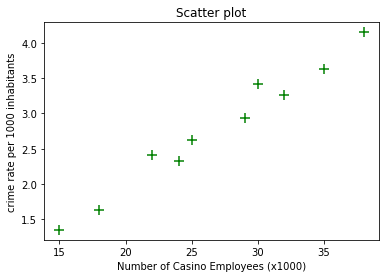

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts
%matplotlib inline
plt.close('all')

df = pd.read_csv('CASINO.CSV')

print(df)

# The independent variable x
x = df['EMPLOYEES']
#print('Number of Casino Employees (x1000): ',x)
# The response variable y
y = df['CRIMERAT']
#print('Corresponding crime rate per 1000 inhabitants : ',y)


fig = plt.figure()
plt.scatter(x,y, marker='+', c='g',s=100)
plt.title('Scatter plot')
plt.xlabel('Number of Casino Employees (x1000)')
plt.ylabel('crime rate per 1000 inhabitants')
plt.show()


2. Use the method of least squares to estimate the values of $\beta_0$ and $\beta_1$.
Note that x.mean() is a scalar and x is a vector. Here broadcasting is used such that x-x.mean() is a vector.
https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html

Also have a look at np.sum() that sums an array over a certain axis. 
https://numpy.org/doc/stable/reference/generated/numpy.sum.html
 
 $*$ is an element wise multiplication
 
 $** n$ is element wise power of n 

26.8
2.7730000000000006
0   -11.8
1    -8.8
2    -2.8
3    -4.8
4    -1.8
5     2.2
6     3.2
7     5.2
8     8.2
9    11.2
Name: EMPLOYEES, dtype: float64
0   -1.423
1   -1.143
2   -0.443
3   -0.363
4   -0.143
5    0.157
6    0.637
7    0.487
8    0.857
9    1.377
Name: CRIMERAT, dtype: float64
0    16.7914
1    10.0584
2     1.2404
3     1.7424
4     0.2574
5     0.3454
6     2.0384
7     2.5324
8     7.0274
9    15.4224
dtype: float64
SSxy:  57.455999999999996
SSxx:  485.59999999999997
beta1hat:  0.11831960461285009
beta0hat:  -0.3979654036243816


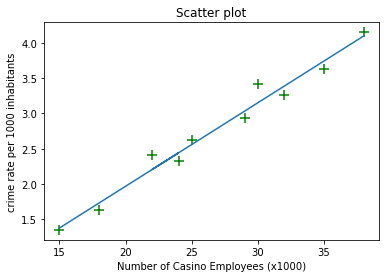

In [2]:
xb = x.mean()
yb = y.mean()
print(xb)
print(yb)
# example of broadcasting => output a vector
print(x-xb)
# example of broadcasting => output a vector
print(y-yb)
# element wise multiplication => output a vector
print((x-xb)*(y-yb))
# we sum of over the rows with np.sum => output a scalar
SSxy = np.sum((x-xb)*(y-yb)) 
print('SSxy: ',SSxy)
# power 2 of a each element of the vector followed by summing over all rows => output a scalar
SSxx = np.sum((x-xb)**2)
print('SSxx: ',SSxx)
# estimated slope
b1h = SSxy / SSxx
print('beta1hat: ',b1h)
# estimated intercept
b0h = yb - b1h * xb
print('beta0hat: ',b0h)

# show the least-squares line
fig = plt.figure()
plt.scatter(x,y, marker='+', c='g',s=100)
plt.title('Scatter plot')
plt.xlabel('Number of Casino Employees (x1000)')
plt.ylabel('crime rate per 1000 inhabitants')
yh = b1h * x + b0h
plt.plot(x, yh)
plt.show()
#print('yhat: ',yh)

In [3]:
# power 2 of a each element of the vector followed by summing over all rows => output a scalar
SSyy = np.sum((y-yb)**2)
print('SSyy: ',SSyy)

r = SSxy / np.sqrt(SSxx*SSyy)

print('correlation coefficient: ',r)

SSyy:  6.97801
correlation coefficient:  0.9870297774893269


THe coefficient of correlation is close to one. Thus, the size of the casino workforce and the crime rate in this city are very highly correlated, at least over the last 10 years. 
 * Caution
 (1) A high correlation does not necessary imply that a caual relationship exists between x and y
 (2) A low correlation does not necessary implys that x and y are unrelated - only that x and y  are not strongly linearly related. The relation could for example be a higher order polynomial.
 
 Some funny spurious correlations:
 
 https://tylervigen.com/spurious-correlations